In [39]:
import json
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

In [40]:
def clean_sleep_data(input_file_path, output_file_path):
    with open(input_file_path, 'r') as f:
        data = json.load(f)

    # keys to remove
    keys_to_remove = ["heart_rate", "awake_time", "bedtime_end_delta", "average_breath_variation",
                      "average_heart_rate", "average_hrv", "contributors", "efficiency",
                      "got_ups", "heart_rate", "hrv", "latency", "lowest_heart_rate",
                      "lowest_heart_rate_time_offset", "movement_30_sec", "period",
                      "readiness", "readiness_score_delta", "restless_periods"
                      "score", "segment_state", "sleep_algorithm_version",
                      "sleep_midpoint", "sleep_score_delta", "type", "wake_ups",
                      "sleep_phase_5_min", "timezone", "bedtime_start_delta",
                      "bedtime_end_delta", "midpoint_at_delta", "restless_periods",
                      "score", "time_in_bed", "total_sleep_duration", "restless"]

    # Iterate over each entry and remove irrelevant keys
    for entry in data['sleep']:
        for key in keys_to_remove:
            if key in entry:
                del entry[key]

        start_time = datetime.fromisoformat(entry["bedtime_start"][:-6])
        end_time = datetime.fromisoformat(entry["bedtime_end"][:-6])

        # Calculate TST in seconds from start and end time
        total_sleep_seconds = (end_time - start_time).total_seconds()

        # Add total sleep time to entry
        entry["total_sleep_seconds"] = total_sleep_seconds

    # Write cleaned data to a new JSON file
    with open(output_file_path, 'w') as f:
        json.dump(data, f, indent=2)

input_file_path = 'oura_sleepData.json'
output_file_path = 'cleaned_oura_SleepData.json'
clean_sleep_data(input_file_path, output_file_path)


In [41]:
def clean_sleep_data_garmin(input_file_path, output_file_path):
    with open(input_file_path, 'r') as f:
        data = json.load(f)

    # keys to remove
    keys_to_remove = ["sleepWindowConfirmationType", "unmeasurableSeconds",
                      "lowestRespiration", "highestRespiration", "retro",
                      "awakeSleepSeconds"]

    # Iterate over each entry and remove unnecessary keys
    for entry in data:
        for key in keys_to_remove:
            if key in entry:
                del entry[key]

        start_time = datetime.fromisoformat(entry["sleepStartTimestampGMT"][:-2])  # Remove last character 'Z'
        end_time = datetime.fromisoformat(entry["sleepEndTimestampGMT"][:-2])  # Remove last character 'Z'

        # Calculate TST in seconds from start and end time
        total_sleep_seconds = (end_time - start_time).total_seconds()

        # Add total sleep time to entry
        entry["totalSleepSeconds"] = total_sleep_seconds

    # Write modified data to a new JSON file
    with open(output_file_path, 'w') as f:
        json.dump(data, f, indent=2)

input_file_path = 'garmin_sleepData.json'
output_file_path = 'cleaned_garmin_sleepData.json'
clean_sleep_data_garmin(input_file_path, output_file_path)


In [42]:
# Load data from JSON files
with open("cleaned_oura_SleepData.json", "r") as file:
    ouraData = json.load(file)

with open("cleaned_garmin_sleepData.json", "r") as file:
    garminData = json.load(file)

In [43]:
ouraData = ouraData["sleep"]

In [44]:
# Extract relevant variables
deep_sleep_ouraData = [entry["deep_sleep_duration"] for entry in ouraData]
deep_sleep_garminData = [entry["deepSleepSeconds"] for entry in garminData]

light_sleep_ouraData = [entry["light_sleep_duration"] for entry in ouraData]
light_sleep_garminData = [entry["lightSleepSeconds"] for entry in garminData]

rem_sleep_ouraData = [entry["rem_sleep_duration"] for entry in ouraData]
rem_sleep_garminData = [entry["remSleepSeconds"] for entry in garminData]

average_respiration_ouraData = [entry["total_sleep_seconds"] for entry in ouraData]
average_respiration_garminData = [entry["totalSleepSeconds"] for entry in garminData]

tst_ouraData = [entry["total_sleep_seconds"] for entry in ouraData]
tst_garminData = [entry["totalSleepSeconds"] for entry in garminData]

In [45]:
# Deep Sleep
print("Descriptive Statistics - Deep Sleep Seconds - Oura:")
print("Mean: ", np.mean(deep_sleep_ouraData), ", Median: ", np.median(deep_sleep_ouraData), ", Standard Deviation: ", np.std(deep_sleep_ouraData), "\n")

print("Descriptive Statistics - Deep Sleep Seconds - Garmin:")
print("Mean: ", np.mean(deep_sleep_garminData), ", Median: ", np.median(deep_sleep_garminData), ", Standard Deviation: ", np.std(deep_sleep_garminData), "\n")

# Light Sleep
print("Descriptive Statistics - Light Sleep Seconds - Oura:")
print("Mean: ", np.mean(light_sleep_ouraData), ", Median: ", np.median(light_sleep_ouraData), ", Standard Deviation: ", np.std(light_sleep_ouraData), "\n")

print("Descriptive Statistics - Light Sleep Seconds - Garmin:")
print("Mean: ", np.mean(light_sleep_garminData), ", Median: ", np.median(light_sleep_garminData), ", Standard Deviation: ", np.std(light_sleep_garminData), "\n")

# REM Sleep
print("Descriptive Statistics - REM Sleep Seconds - Oura:")
print("Mean: ", np.mean(rem_sleep_ouraData), ", Median: ", np.median(rem_sleep_ouraData), ", Standard Deviation: ", np.std(rem_sleep_ouraData), "\n")

print("Descriptive Statistics - REM Sleep Seconds - Garmin:")
print("Mean: ", np.mean(rem_sleep_garminData), ", Median: ", np.median(rem_sleep_garminData), ", Standard Deviation: ", np.std(rem_sleep_garminData), "\n")

# Average Respiration
print("Descriptive Statistics - Average Respiration - Oura:")
print("Mean: ", np.mean(average_respiration_ouraData), ", Median: ", np.median(average_respiration_ouraData), ", Standard Deviation: ", np.std(average_respiration_ouraData), "\n")

print("Descriptive Statistics - Average Respiration - Garmin:")
print("Mean: ", np.mean(average_respiration_garminData), ", Median: ", np.median(average_respiration_garminData), ", Standard Deviation: ", np.std(average_respiration_garminData), "\n")

# Average Respiration
print("Descriptive Statistics - Total Sleep Time - Oura:")
print("Mean: ", np.mean(tst_ouraData), ", Median: ", np.median(tst_ouraData), ", Standard Deviation: ", np.std(tst_ouraData), "\n")

print("Descriptive Statistics - Average Respiration - Garmin:")
print("Mean: ", np.mean(tst_garminData), ", Median: ", np.median(average_respiration_garminData), ", Standard Deviation: ", np.std(average_respiration_garminData), "\n")


Descriptive Statistics - Deep Sleep Seconds - Oura:
Mean:  5873.571428571428 , Median:  6105.0 , Standard Deviation:  1681.4985117144643 

Descriptive Statistics - Deep Sleep Seconds - Garmin:
Mean:  5245.714285714285 , Median:  5370.0 , Standard Deviation:  2786.769031091931 

Descriptive Statistics - Light Sleep Seconds - Oura:
Mean:  12321.42857142857 , Median:  13725.0 , Standard Deviation:  3013.3295707640104 

Descriptive Statistics - Light Sleep Seconds - Garmin:
Mean:  16242.857142857143 , Median:  16500.0 , Standard Deviation:  3401.6370608690086 

Descriptive Statistics - REM Sleep Seconds - Oura:
Mean:  6435.0 , Median:  6945.0 , Standard Deviation:  1762.3472578192009 

Descriptive Statistics - REM Sleep Seconds - Garmin:
Mean:  6085.714285714285 , Median:  5880.0 , Standard Deviation:  2053.407322635492 

Descriptive Statistics - Average Respiration - Oura:
Mean:  26592.14285714286 , Median:  26700.0 , Standard Deviation:  5482.669199488549 

Descriptive Statistics - Avera

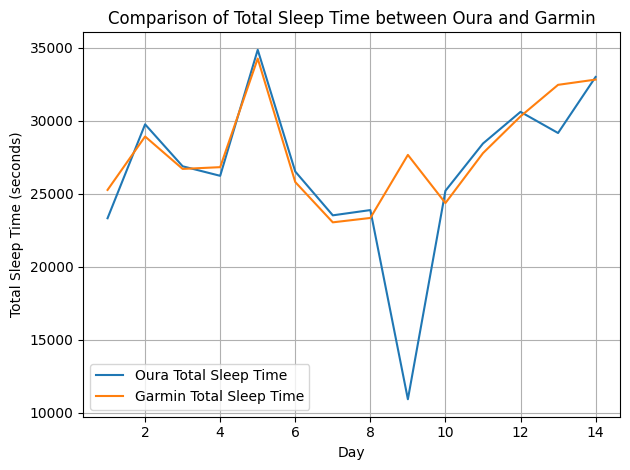

In [49]:
# Extract total sleep duration from Oura/Garmin data
tst_ouraData = [entry["total_sleep_seconds"] for entry in ouraData]

tst_garminData = [entry["totalSleepSeconds"] for entry in garminData]

# Make num of days the x-axis
x_values = range(1, len(tst_ouraData) + 1)

# Create line plot
plt.plot(x_values, tst_ouraData, label="Oura Total Sleep Time")
plt.plot(x_values, tst_garminData, label="Garmin Total Sleep Time")
plt.xlabel("Day")
plt.ylabel("Total Sleep Time (seconds)")
plt.title("Comparison of Total Sleep Time between Oura and Garmin")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()